# Assignment 5 - PCA and ANN for Cancer Screening

## 1.0 Project Overview

This project will perform a Principal Component Analysis and use an Artificial Neural Network Classifier in order to study a large set of screening data to assist in predicting the link between this screening data (input) and the determination of cancer (output).

The dataset comes with data from 216 patients consisting of 4000 features in the screening data, categorized as cancer (C) or no cancer (N).

## 2.0 Data Preprocessing

### 2.1 Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time

### 2.2 Import and Review the Dataset

In [8]:
dataset = pd.read_csv('Cancer.csv', header=None)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000
0,0.063915,0.033242,0.018484,0.008618,0.035629,0.037925,0.028865,0.061731,0.063100,0.024787,...,0.021515,0.017385,0.018564,0.010027,0.012907,0.023405,0.038839,0.038151,0.032085,C
1,0.025409,0.051085,0.056305,0.021738,0.027410,0.014914,0.022455,0.023957,0.060527,0.047382,...,0.055033,0.080864,0.053423,0.051942,0.013187,0.028573,0.020427,0.023261,0.019975,C
2,0.025536,0.036123,0.054195,0.009735,0.027521,0.052255,0.042812,0.069087,0.069873,0.066629,...,0.033783,0.029022,0.046397,0.033288,0.041889,0.019256,-0.009447,0.021481,0.025569,C
3,0.012817,0.029652,0.079290,0.050677,0.039737,0.057713,0.044492,0.034581,0.042587,0.034147,...,0.036083,0.038598,0.048881,0.025569,0.026710,0.025122,0.047466,0.046706,0.043482,C
4,0.019846,-0.010577,-0.007504,0.019042,0.068786,0.061764,0.039036,0.020445,0.025988,0.066716,...,0.032044,0.026320,0.072016,0.070145,0.055744,0.051084,0.036683,0.043729,0.040289,C


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Columns: 4001 entries, 0 to 4000
dtypes: float64(4000), object(1)
memory usage: 6.6+ MB


In [11]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.035517,0.034007,0.031094,0.029357,0.030461,0.031659,0.037941,0.052028,0.053155,0.043725,...,0.031471,0.030373,0.026793,0.028039,0.030066,0.028976,0.030166,0.029309,0.028509,0.028308
std,0.021006,0.023687,0.020580,0.018802,0.017156,0.019543,0.020291,0.025342,0.025847,0.022084,...,0.015407,0.016694,0.017838,0.017923,0.016361,0.014763,0.016750,0.016990,0.016578,0.016887
min,-0.004115,-0.022688,-0.016533,-0.006113,-0.010742,-0.009920,-0.010414,0.006379,0.009280,0.007561,...,0.005392,0.000822,-0.013180,-0.000679,0.002361,-0.009846,-0.001082,-0.009447,-0.000229,-0.000048
25%,0.022691,0.018226,0.017486,0.016409,0.020970,0.018911,0.022679,0.034419,0.036921,0.030243,...,0.020897,0.018252,0.015577,0.017010,0.018863,0.018518,0.018582,0.019116,0.017655,0.017257
50%,0.032739,0.029476,0.028013,0.027143,0.027636,0.028057,0.035930,0.047932,0.049006,0.038740,...,0.028868,0.026192,0.023385,0.026182,0.027577,0.027505,0.027168,0.026591,0.025703,0.025662
75%,0.044797,0.044346,0.041997,0.038146,0.039267,0.041704,0.049348,0.064680,0.065996,0.055567,...,0.039749,0.039592,0.034818,0.036021,0.038568,0.037931,0.039623,0.036457,0.037165,0.036525
max,0.176470,0.132940,0.114660,0.123630,0.099995,0.120050,0.113420,0.142060,0.212770,0.167180,...,0.080878,0.086974,0.113020,0.123710,0.101980,0.091268,0.093152,0.107750,0.113910,0.101880


As there are 4000 columns of data, it is time consuming and possibly irrelevant to view the data at this time, and shall wait until the PCA.

### 2.3 Enconding the Output Data

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Label Mapping: ", label_mapping)

Label Mapping:  {'C': 0, 'N': 1}


We will note that the Cancer labelling is encoded as 0 and No-Cancer labelling is 1.

### 2.4 Separation of Input and Output

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 0)

### 2.5 Scaling the Features

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3.0 Principal Component Analysis

### 3.1 Transform the Dataset

In the first step, we will do an eigentransformation of our dataset to 10 components using PCA, and use these as the basis of our analysis.

In [23]:
from sklearn.decomposition import PCA

PrinCom = PCA(n_components = 10) # choose the number of PCs
PrinCom.fit(X_train)

Z_train = PrinCom.transform(X_train)
Z_test = PrinCom.transform(X_test)

### 3.2 Initial Visualization of the Dataset

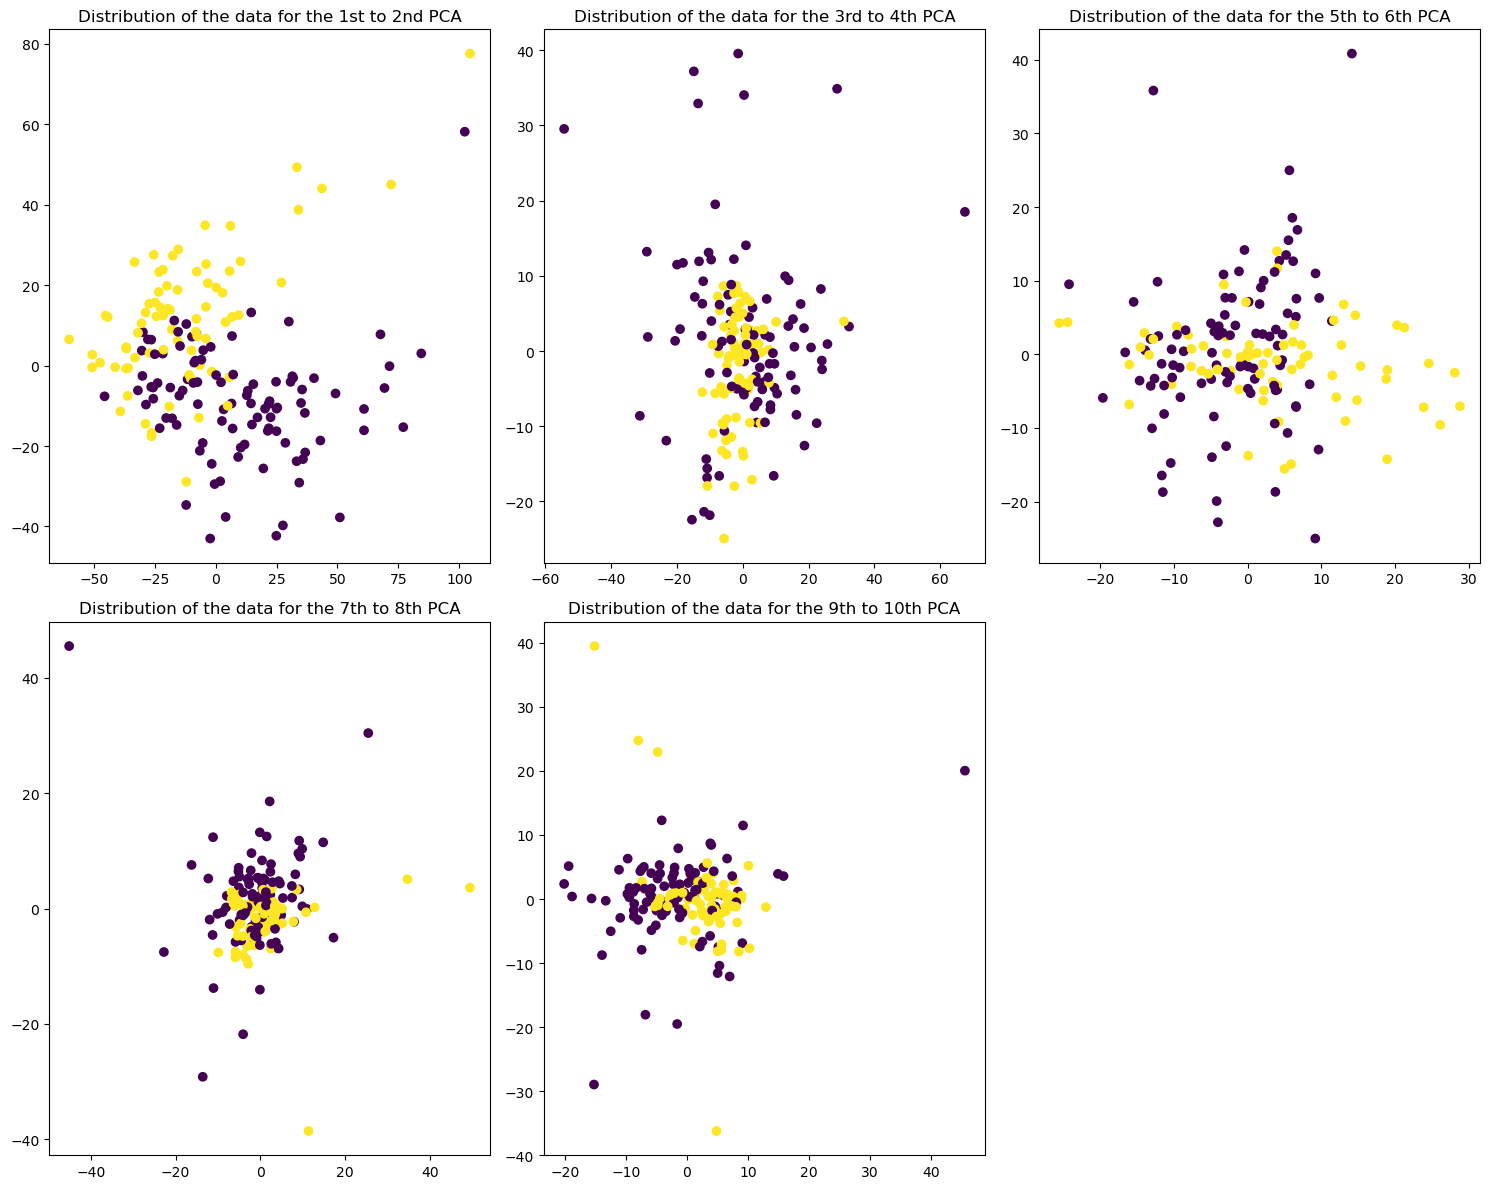

In [25]:
# Code from chatgtp
fig, axes = plt.subplots(2, 3, figsize=(15, 12))

# Plot Pairing
pairs = [
    (0, 1, "Distribution of the data for the 1st to 2nd PCA"),
    (2, 3, "Distribution of the data for the 3rd to 4th PCA"),
    (4, 5, "Distribution of the data for the 5th to 6th PCA"),
    (6, 7, "Distribution of the data for the 7th to 8th PCA"),
    (8, 9, "Distribution of the data for the 9th to 10th PCA")
]

# Loop over each pair and its corresponding subplot
for i, (x_idx, y_idx, title) in enumerate(pairs):
    row, col = divmod(i, 3)
    axes[row, col].scatter(Z_train[:, x_idx], Z_train[:, y_idx], c=y_train)
    axes[row, col].set_title(title)

# Hide any empty subplots
for j in range(i + 1, 6):  # Total subplots (2 rows * 3 columns = 6)
    row, col = divmod(j, 3)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

As we can see, the plots don't appear to have typical linear or polynomial regressions.

### 3.3 Contributions of PCs

[906.3372537005481, 337.40188948628884, 155.939952960408, 107.70108150553509, 99.34350614436698, 75.93973952332043, 68.763573814437, 58.22144901747444, 56.28115746641262, 49.83807553031147]  are the eigenvalues in this analysis


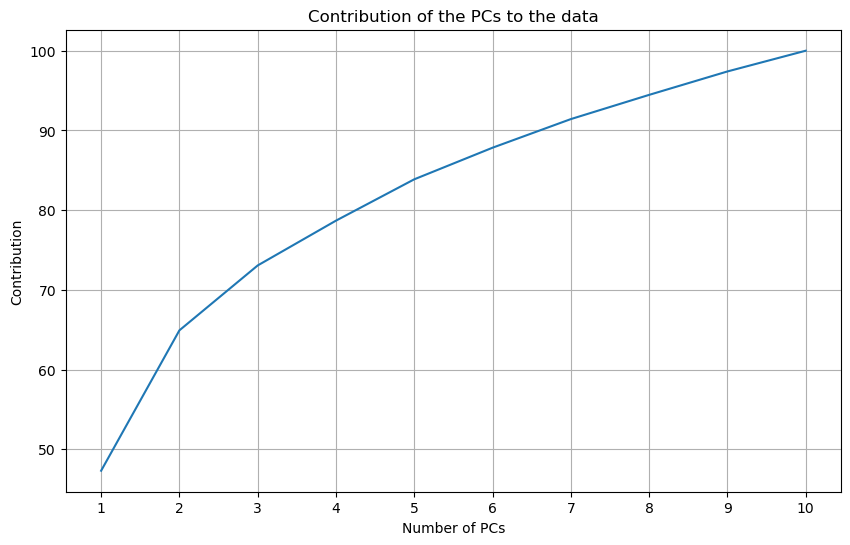

In [28]:
e = []
for z in Z_train.T:
  e.append(np.var(z))

print(e, " are the eigenvalues in this analysis")

contributions = []
for i in range(Z_train.shape[1]):
  contributions.append(np.sum(e[:i+1]) / np.sum(e))

plt.figure(figsize=(10,6))
plt.plot(list(range(1, 11)), [i*100 for i in contributions])
plt.title("Contribution of the PCs to the data")
plt.xlabel("Number of PCs")
plt.ylabel("Contribution")
plt.grid()
plt.xticks(list(range(1,11)))
plt.show()

Here we can see that the first PC contributes to about 45% of the output with regards to the 10 PCs. This may not fully reflect on the 10 component contribution with regards to the 4000 features.

In [30]:
pd.DataFrame(Z_train).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02
mean,-8.262125e-16,-3.304850e-16,3.304850e-16,8.262125e-17,-8.262125e-17,2.633552e-16,-4.131062e-17,3.098297e-16,1.652425e-16,1.445872e-16
std,3.019333e+01,1.842213e+01,1.252405e+01,1.040821e+01,9.996222e+00,8.739784e+00,8.316592e+00,7.652576e+00,7.523981e+00,7.080221e+00
min,-6.014826e+01,-4.300767e+01,-5.430209e+01,-2.493041e+01,-2.557045e+01,-2.501719e+01,-4.513823e+01,-3.855763e+01,-2.014952e+01,-3.621984e+01
25%,-2.200348e+01,-1.081409e+01,-5.886403e+00,-5.195564e+00,-6.050363e+00,-4.058491e+00,-4.041742e+00,-3.027674e+00,-4.774279e+00,-1.903200e+00
50%,-6.167542e+00,-2.276483e+00,-8.407757e-01,-9.583492e-04,7.998147e-02,-3.742962e-01,-1.183227e-01,-1.632603e-01,8.026805e-01,2.348090e-01
75%,1.776987e+01,1.060763e+01,4.876006e+00,4.516681e+00,5.469173e+00,3.805440e+00,2.699151e+00,2.960818e+00,4.812053e+00,2.455483e+00
max,1.043897e+02,7.760150e+01,6.747707e+01,3.955420e+01,2.882528e+01,4.085520e+01,4.948255e+01,4.548672e+01,4.561179e+01,3.949021e+01


## 4.0 Artificial Neural Network

### 4.1 Building the Model

In [33]:
# Scale Data
sc2 = StandardScaler()
Z_train_scaled = sc.fit_transform(Z_train)
Z_test_scaled = sc.transform(Z_test)

# Create Inputs
inputs= Z_train_scaled[:, 0:9]

# Create Model
DataModel=tf.keras.models.Sequential()
DataModel.add(tf.keras.layers.Dense(16,activation='relu'))
DataModel.add(tf.keras.layers.Dense(8,activation='relu'))

# Output
DataModel.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# Compile Model
DataModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit Model
h = DataModel.fit(inputs, y_train, batch_size = 16, epochs = 64, validation_split=0.2, verbose=0)

### 4.2 Plotting the Data

Deciding to go with a binary evaluation for the classification problem as there are only two possible outputs

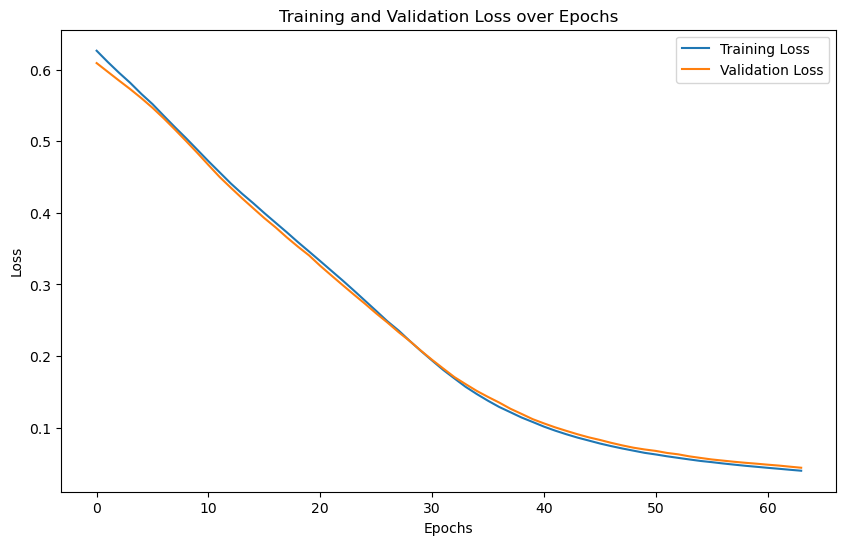

In [36]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
training_loss = h.history['loss']
validation_loss = h.history.get('val_loss')  # Only available if validation_split is used

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')

# Plot validation loss if it exists
if validation_loss:
    plt.plot(validation_loss, label='Validation Loss')

# Labeling the plot
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

In [37]:
DataModel.evaluate(Z_test_scaled[:, 0:9], y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9744 - loss: 0.0743


[0.07032405585050583, 0.9772727489471436]

Here we see that the dataset appears to have 100% accuracy, which could be high because of the low amount of test data.

### 4.3 No Rescaling Data (Building the Model and Plotting)

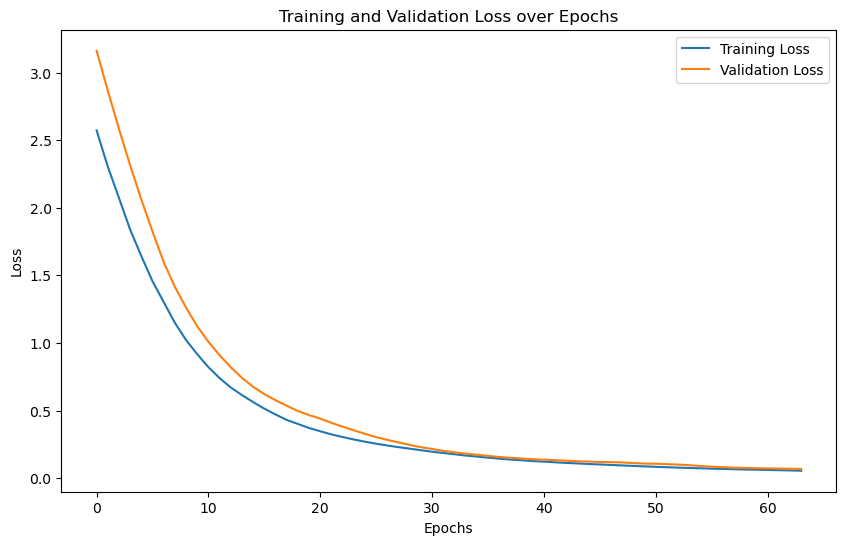

In [40]:
inputs= Z_train[:, 0:9]


DataModel3=tf.keras.models.Sequential()

DataModel3.add(tf.keras.layers.Dense(16,activation='relu'))
DataModel3.add(tf.keras.layers.Dense(8,activation='relu'))
DataModel3.add(tf.keras.layers.Dense(1,activation='sigmoid'))

DataModel3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

h = DataModel3.fit(inputs, y_train, batch_size = 32, epochs = 64, validation_split=0.2, verbose=0)


training_loss = h.history['loss']
validation_loss = h.history.get('val_loss')  # Only available if validation_split is used

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')

# Plot validation loss if it exists
if validation_loss:
    plt.plot(validation_loss, label='Validation Loss')

# Labeling the plot
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

In [41]:
DataModel3.evaluate(Z_test[:, 0:9], y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9744 - loss: 0.0516  


[0.051142677664756775, 0.9772727489471436]

Again we find an accuracy drops to 92%, which is still very good. 

### 4.4 Test Set Prediction & Model Evaluations

In [44]:
# Predicting for the scaled
y_pred_ANN_sc = DataModel.predict(Z_test_scaled[:, 0:9])
DataModel.evaluate(Z_test_scaled[:, 0:9], y_pred_ANN_sc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.1296  


[0.12895041704177856, 0.0]

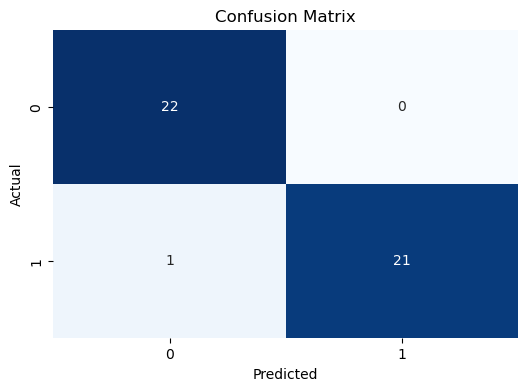

Model Accuracy is= 97.73 %


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred_ANN_sc = (y_pred_ANN_sc > 0.5) #Classification metrics can't handle a mix of binary and continuous targets, so we change the target (y_pred) to binary, True/False
cm_ANN = confusion_matrix(y_test, y_pred_ANN_sc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ANN, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()
print("Model Accuracy is=", round(accuracy_score(y_test, y_pred_ANN_sc)*100,2), "%")

In [46]:
# Predicting for the unscaled
y_pred_ANN = DataModel3.predict(Z_test[:, 0:9])
DataModel3.evaluate(Z_test[:, 0:9], y_pred_ANN)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.1226  


[0.12282658368349075, 0.0]

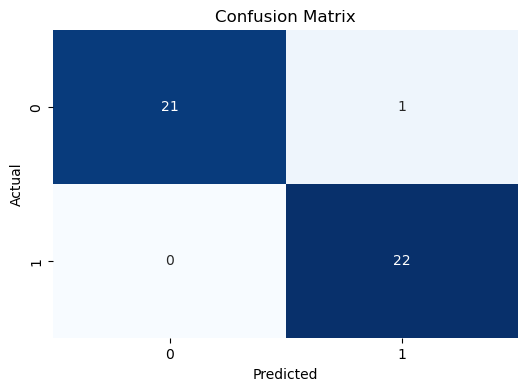

Model Accuracy is= 97.73 %


In [47]:
y_pred_ANN = (y_pred_ANN > 0.5) #Classification metrics can't handle a mix of binary and continuous targets, so we change the target (y_pred) to binary, True/False
cm_ANN = confusion_matrix(y_test, y_pred_ANN)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ANN, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()
print("Model Accuracy is=", round(accuracy_score(y_test, y_pred_ANN)*100,2), "%")

## 5.0 Conclusions

Based on the models developed using 10 data points, we find that using scaled data offers a higher accuracy than using unscaled. Though regardless of the scaled/unscaled, we find that only using 10 features for the basis of cancer detection has offered a fairly high contribution to the overall model accuracy. 